In [46]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp4plot'
urlretrieve(URL, 'plot_helper.py')

from plot_helper import *

# Matrix

In many books, they'll tell you that a matrix is a "table" of numbers, ordered in rows and columns. Maybe that's enough for some people, but you will get a kick out of seeing what a matrix does!<br>

lets visualize what is Matrix and how it repesent Linear trasnformation Where one basis vector tranform into new basis vector.






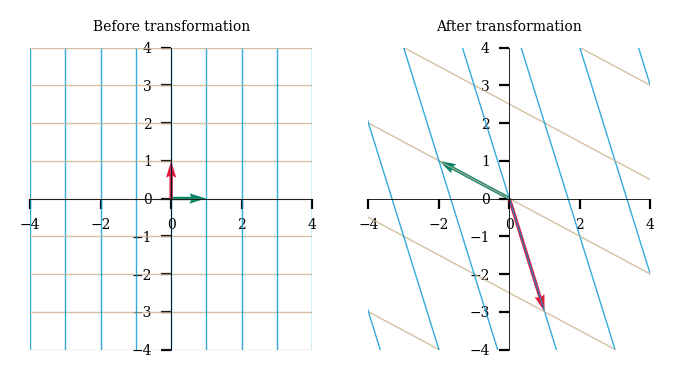

In [47]:
A = [[-2,1],[1,-3]]
A = np.array(A)

plot_linear_transformation(A)

The matrix represents the linear transformation that takes vector c and transforms it into c′.<br>
for suppose we have two basis vector: <br><br>$\begin{equation*}
i = 
\begin{pmatrix}
1  \\
0 
\end{pmatrix}
j = 
\begin{pmatrix}
0  \\
1 
\end{pmatrix}
\end{equation*}$<br><br>
and we have another basis vectors its values are: <br><br> $\begin{equation*}
a = 
\begin{pmatrix}
-2  \\
1
\end{pmatrix}
b = 
\begin{pmatrix}
1  \\
-3 
\end{pmatrix}
\end{equation*}$<br><br>
lets say the vector $\begin{equation*}
c = 
\begin{pmatrix}
2  \\
1
\end{pmatrix}
\end{equation*}$ is the Linear Combination of two basis vector $i, j$ as 
$\begin{equation*}
c = 
\begin{pmatrix}
2  \\
1
\end{pmatrix}
= 2i + 1j
\end{equation*}$<br><br> So the main question is that when we transform our basis vector from one coordinates to another just like $(i, j)$ to $(a, b)$ So what's the new coordinate of our vector $c$ in new basis.<br>
For findout we need to Multiply Our new Matrix to vector we have,<br><br>
$\begin{equation*}
\begin{pmatrix}
-2 & 1  \\
1 & -3
\end{pmatrix}
\begin{pmatrix}
2  \\
1
\end{pmatrix}
=
\begin{pmatrix}
1  \\
-3
\end{pmatrix}
\end{equation*}$


In [48]:
c = np.array([[2],[1]])
print(f'A = {A}\n\n c ={c}')

A = [[-2  1]
 [ 1 -3]]

 c =[[2]
 [1]]


In [49]:
# Vector in New basis vector adter transformation
A.dot(c)

array([[-3],
       [-1]])

**lets see what the transformation does to one particular vector.**

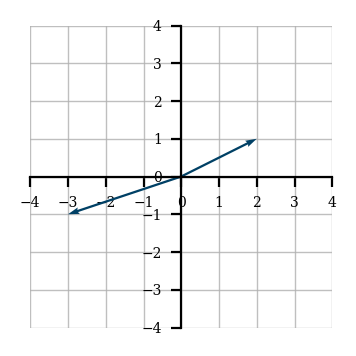

In [50]:
vectors = [c, A.dot(c)]
plot_vector(vectors)

# Lets play with some important transformation

## 90 degree Rotation (Counter Clockwise)

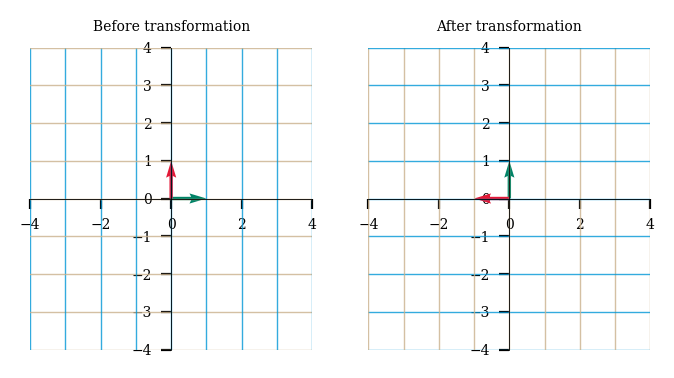

In [51]:
rotation_left = np.array([[0,-1],[1,0]])
plot_linear_transformation(rotation_left)

## Shear

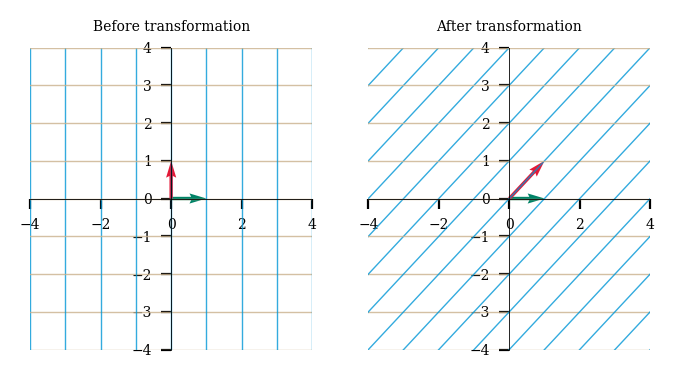

In [52]:
shear = np.array([[1,1],[0,1]])
plot_linear_transformation(shear)

## Scaling

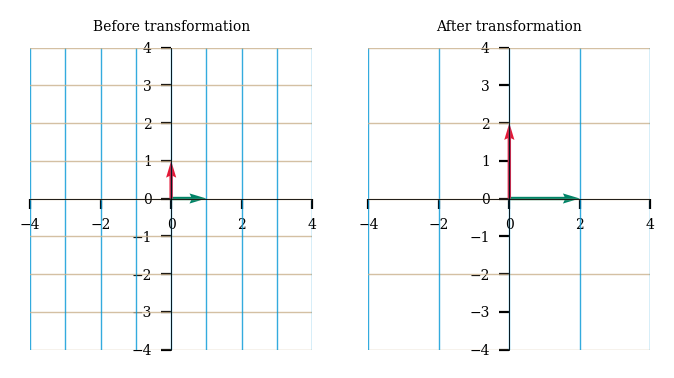

In [53]:
scaling = np.array([[1,0],[0,1]])
plot_linear_transformation(2*scaling)

## 90 degree Rotation (Clockwise)

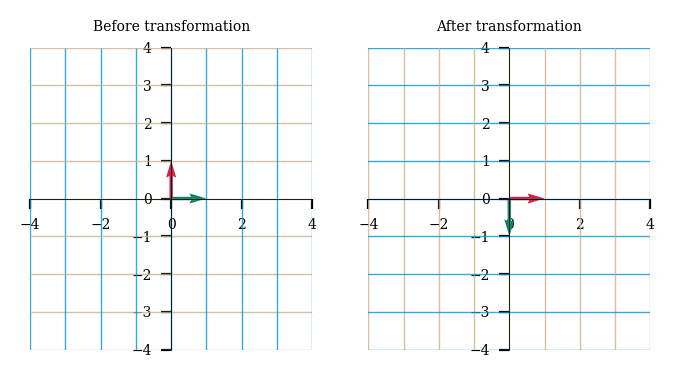

In [54]:
 rotation_right = np.array([[0,1],[-1,0]])
 plot_linear_transformation(rotation_right)

## Identity
The common structure of scaling matrices is that they have non-zero values in the diagonal, but zero values elsewhere. One special scaling matrix leaves the lengths of the basis vectors unchanged: it is called the identity matrix:

In [55]:
identity = np.eye(2)
identity

array([[1., 0.],
       [0., 1.]])

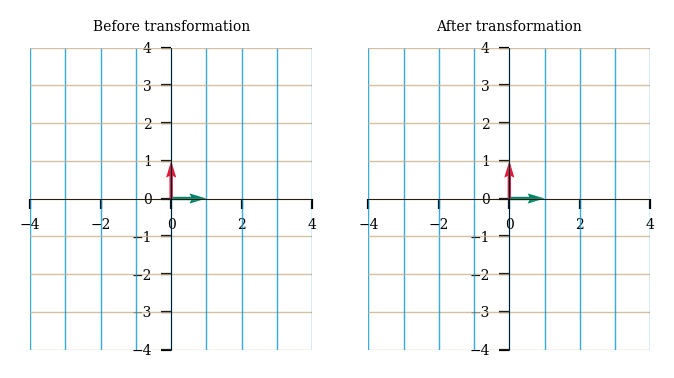

In [56]:
plot_linear_transformation(identity)

# Matrix - Matrix Multiplication

What do you think happens when we apply two linear transformations? For example, if we rotate all vectors by 90 degrees to the left, and then apply a shear transformation?<br><br>
$\begin{equation*}
\begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 1 \\
0 & 1
\end{pmatrix} = \begin{pmatrix}
? & ? \\
? & ?
\end{pmatrix}
\end{equation*}$ <br><br>
The final vector is the result of the two combined linear transformations. It is analogous to the composition of two functions, and its computation leads to a matrix-matrix multiplication <br><br>


In [57]:
print(f"Shear:\n {shear}")
print(f"Rotation Left:\n {rotation_left}")
print(f"Combine linear Transformation:\n{shear@rotation_left}")

Shear:
 [[1 1]
 [0 1]]
Rotation Left:
 [[ 0 -1]
 [ 1  0]]
Combine linear Transformation:
[[ 1 -1]
 [ 1  0]]


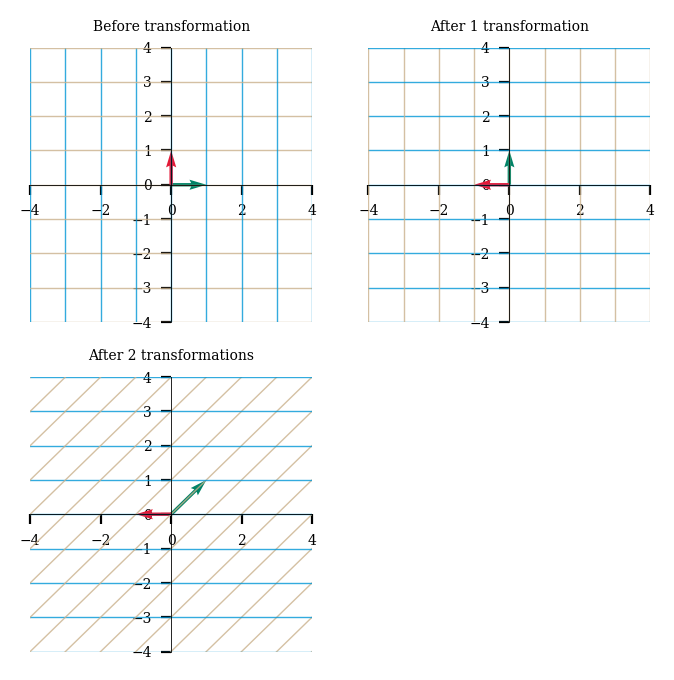

In [58]:
# the order of transformation: from right to left
plot_linear_transformations(rotation_left, shear)

This transformation bring a question in our mind that matrix matrix multiplication is commutitive or not mean AB = BA ?<be>
lets check it out with vizulaization

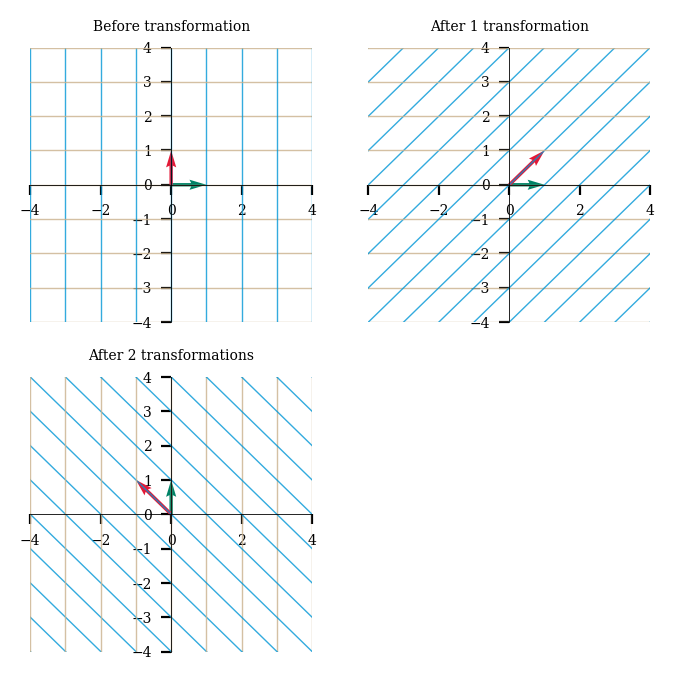

In [59]:
plot_linear_transformations(shear, rotation_left)

Abve transformation clearly indicate that its **not communtutive** because both transformations are different.

# Inverse of a matrix¶
Thinking of matrices as linear transformations also helps demistify the idea of an inverse. When one transformation undoes the previous one. This means that the second transformation is the inverse of the first.

$ RR^{-1} = I$ <br><br>

$\begin{equation*}
\begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix} =
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\end{equation*}$



In [60]:
print(f"Rotation Left:\n {rotation_left}")
print(f"Inverse:\n {np.linalg.inv(rotation_left)}")
print(f"Combine linear Transformation:\n{np.linalg.inv(rotation_left)@rotation_left}")

Rotation Left:
 [[ 0 -1]
 [ 1  0]]
Inverse:
 [[ 0.  1.]
 [-1. -0.]]
Combine linear Transformation:
[[1. 0.]
 [0. 1.]]


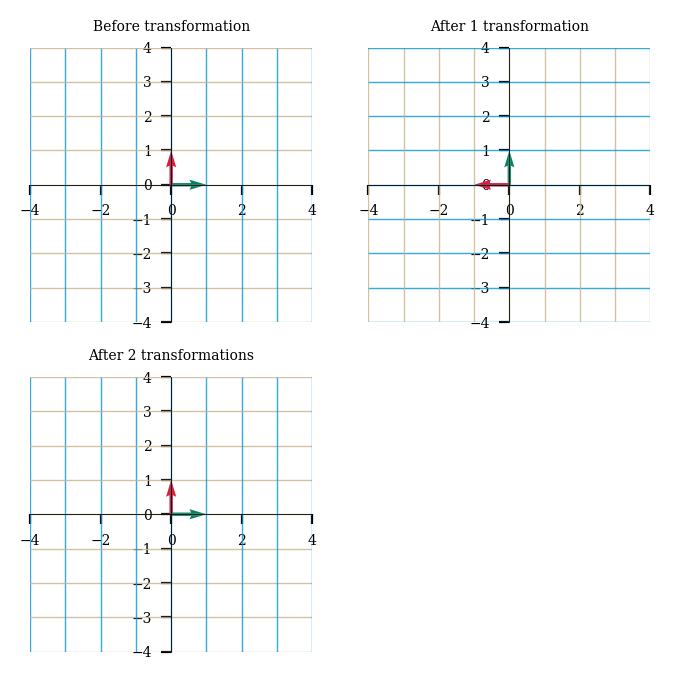

In [63]:
plot_linear_transformations(rotation_left, np.linalg.inv(rotation_left) )